# Gradient of Image

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [2]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [3]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [4]:
def rgb_to_gray(img):
  grayImage = np.zeros([img.shape[0], img.shape[1]])
  R = np.array(img[:,:,0])
  G = np.array(img[:,:,1])
  B = np.array(img[:,:,2])

  Avg = (R+G+B) / 3
  grayImage = Avg
  
  return grayImage

In [5]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = rgb_to_gray(I0)
    
    
num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [6]:
def normalize(img):
  return (img - np.min(img)) / (np.max(img) - np.min(img))

In [7]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = normalize(I)

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [8]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    for x in range(I.shape[0]-1):
        for y in range(I.shape[1]):
             D[x][y] = I[x+1][y] - I[x][y]
    
    for y in range(I.shape[1]):
        D[I.shape[0]-1][y] = I[I.shape[0]-2][y];
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

In [9]:
print(compute_derivative_x_forward(I))

[[-0.02352941  0.08235294 -0.09803922 ... -0.00784314  0.03921569
  -0.01960784]
 [-0.10980392  0.03137255  0.         ...  0.09019608 -0.03921569
   0.01568627]
 [ 0.07058824  0.07843137  0.0745098  ... -0.06666667  0.08235294
  -0.01960784]
 ...
 [-0.07058824  0.04313725 -0.17254902 ...  0.15294118 -0.2745098
  -0.09411765]
 [-0.04705882 -0.10588235 -0.05882353 ... -0.10980392  0.89411765
   0.00784314]
 [ 0.21176471  0.31372549  0.18431373 ...  0.22352941  0.03921569
   0.00392157]]


- backward difference : $ I[x, y] - I[x-1, y] $ 

In [10]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    for x in range(1, I.shape[0]):
        for y in range(I.shape[1]):
             D[x][y] = I[x][y] - I[x-1][y]

    for y in range(I.shape[1]):
        D[0][y] = I[1][y];
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [11]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    for x in range(1, I.shape[0]-1):
        for y in range(I.shape[1]):
             D[x][y] = (I[x+1][y] - I[x-1][y]) / 2
    
    for y in range(I.shape[1]):
        D[I.shape[0]-1][y] = I[I.shape[0]-2][y];
        D[0][y] = I[1][y];
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [12]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    for x in range(I.shape[0]):
        for y in range(I.shape[1]-1):
             D[x][y] = I[x][y+1] - I[x][y]
    
    for x in range(I.shape[0]):
        D[x][I.shape[1]-1] = I[x][I.shape[1]-2];

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [13]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    for x in range(I.shape[0]):
        for y in range(1, I.shape[1]):
             D[x][y] = I[x][y] - I[x][y-1]

    for x in range(I.shape[0]):
        D[x][0] = I[x][1];
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [14]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    for x in range(I.shape[0]):
        for y in range(1, I.shape[1]-1):
             D[x][y] = (I[x][y+1] - I[x][y-1]) / 2
    
    for x in range(I.shape[0]):
        D[x][I.shape[1]-1] = I[x][I.shape[1]-2];
        D[x][0] = I[x][1];
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [15]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    x_central = np.power(compute_derivative_x_central(I),2)
    y_central = np.power(compute_derivative_y_central(I),2)

    norm_gradient = x_central + y_central

    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

___

___

## functions for presenting the results

___

___

In [16]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [17]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [18]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [19]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [20]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [21]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [22]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [23]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [24]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [25]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [26]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [27]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [28]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [29]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [30]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [31]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [32]:
def function_result_17():

    D = compute_norm_gradient_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


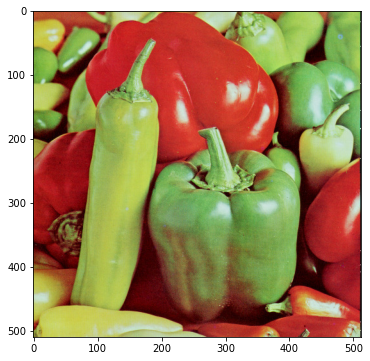

**************************************************
## [RESULT 02]
**************************************************


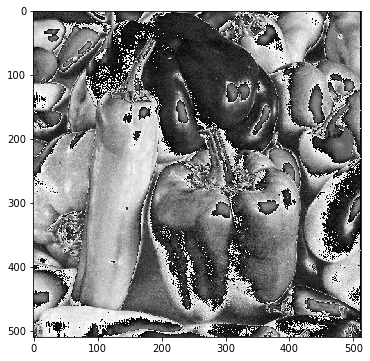

**************************************************
## [RESULT 03]
**************************************************


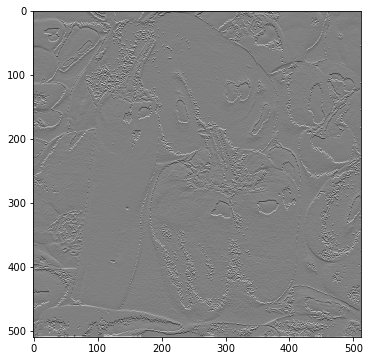

**************************************************
## [RESULT 04]
**************************************************


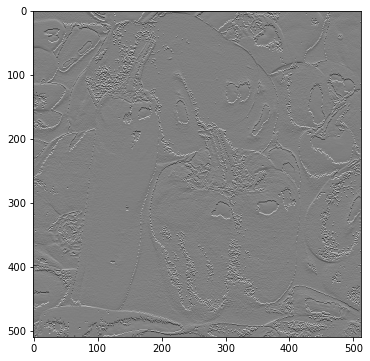

**************************************************
## [RESULT 05]
**************************************************


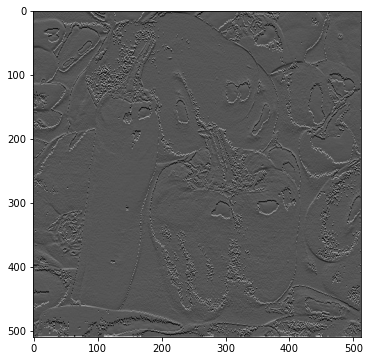

**************************************************
## [RESULT 06]
**************************************************


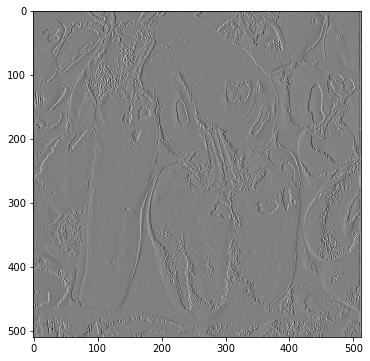

**************************************************
## [RESULT 07]
**************************************************


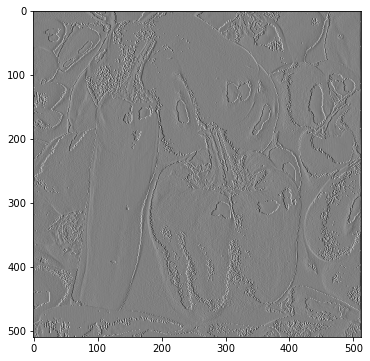

**************************************************
## [RESULT 08]
**************************************************


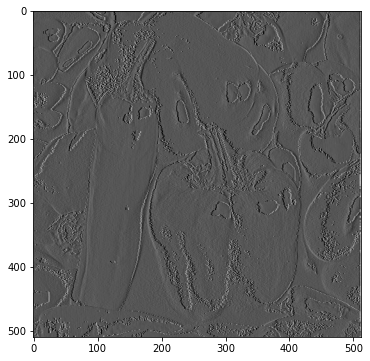

**************************************************
## [RESULT 09]
**************************************************


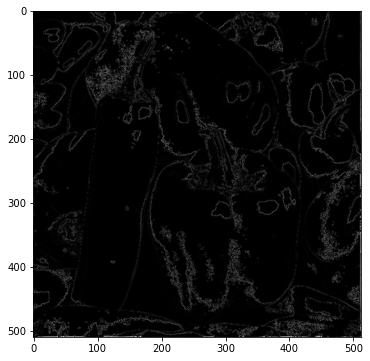

**************************************************
## [RESULT 10]
**************************************************


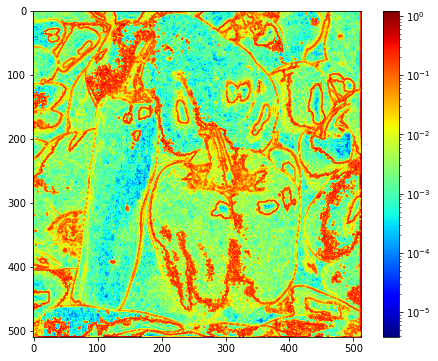

**************************************************
## [RESULT 11]
**************************************************
value1 =  -0.02352941176470591
value2 =  0.00392156862745098
value3 =  -0.01568627450980392
value4 =  0.03529411764705881
**************************************************
## [RESULT 12]
**************************************************
value1 =  0.3137254901960784
value2 =  0.00784313725490196
value3 =  -0.9568627450980391
value4 =  -0.039215686274509665
**************************************************
## [RESULT 13]
**************************************************
value1 =  0.3137254901960784
value2 =  0.00392156862745098
value3 =  -0.4862745098039215
value4 =  -0.0019607843137254277
**************************************************
## [RESULT 14]
**************************************************
value1 =  -0.10588235294117648
value2 =  0.9333333333333332
value3 =  0.9529411764705883
value4 =  0.0
**************************************************
## [RESULT 15

In [33]:
number_result = 17

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)